# Sampling from the Haar

In [21]:
import sym_nn.utils as sym_nn_utils
import torch

# Create a random tensor x of size 5000, 3
x = torch.rand(500, 3)
g_haar = sym_nn_utils.orthogonal_haar(dim=3, target_tensor=x)

# Subset g_haar to take the first two rows of the first coluns
g_haar = g_haar[:, :2, 0]
print(g_haar.shape)

torch.Size([500, 2])


# Visualisations

In [8]:
import matplotlib.pyplot as plt
import numpy as np

## Different time points

In [60]:
exp_name = "check_stochasticity_gamma_30m_fixed_no_noise_backbone"
results_dir = f"/data/localhost/not-backed-up/ashouritaklimi/symdiff/{exp_name}"
times = [0, 500, 1000]
xhs = False
gammas = False
gammas_backbone = True
n_mols = 10

mol_results = {i: {"gamma_backbone_samples": {},
                   "xh_samples": {}, 
                   "gamma_samples":{} } for i in range(n_mols)}

# /data/localhost/not-backed-up/ashouritaklimi/symdiff/   stochastic_gamma_samples_0
for i in range(n_mols):
    for t in times:
        if xhs:
            mol_results[i]["xh_samples"][t] = np.load(f"{results_dir}/t_{t}/stochastic_xh_samples_{i}.npy")
        if gammas:
            mol_results[i]["gamma_samples"][t] = np.load(f"{results_dir}/t_{t}/stochastic_gamma_samples_{i}.npy")
        if gammas_backbone:
            mol_results[i]["gamma_backbone_samples"][t] = np.load(f"{results_dir}/t_{t}/stochastic_gamma_back_samples_{i}.npy")    

### Visualising xh samples

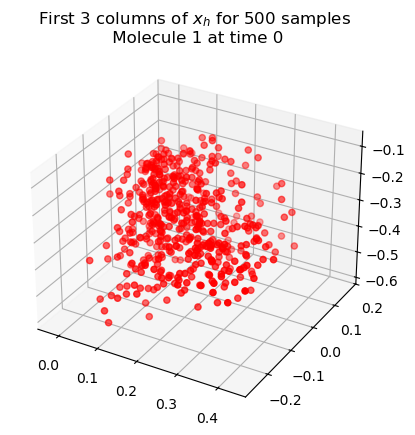

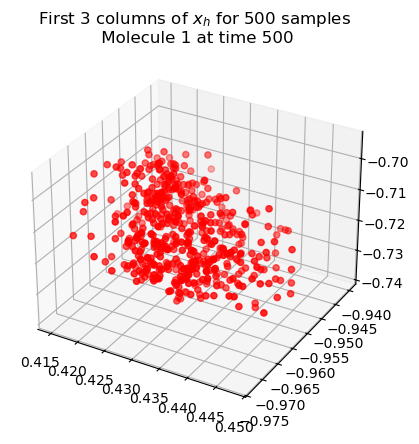

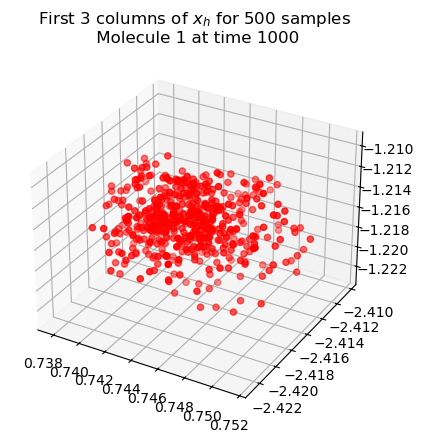

In [51]:
mol = 1
m = 500
atom = 4
for t in times:
    x = mol_results[mol]["xh_samples"][t][:, atom, :3]
    indx = np.random.choice(gamma_x.shape[0], m, replace=False)
    x = x[indx]

    # Plot 3D
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(x[:, 0], x[:, 1], x[:, 2], c='r', marker='o')
    ax.set_title(f'First 3 columns of $x_h$ for {m} samples\n Molecule {mol} at time {t}')
    plt.show()

### Visualising stochastic gamma samples

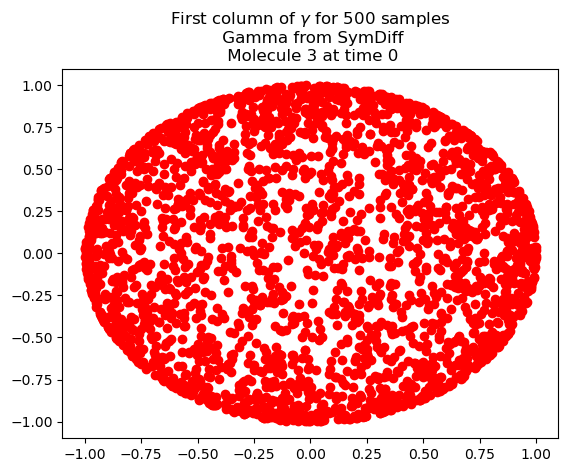

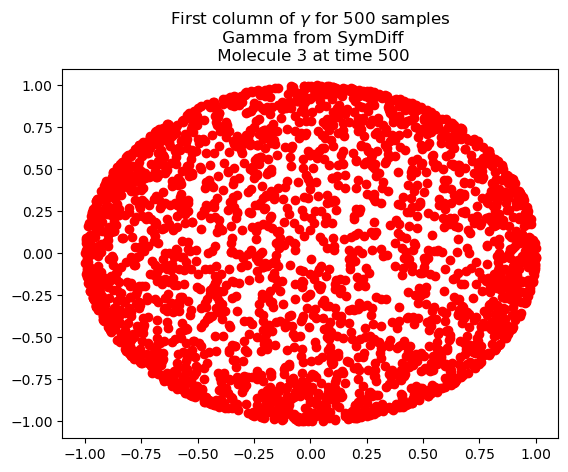

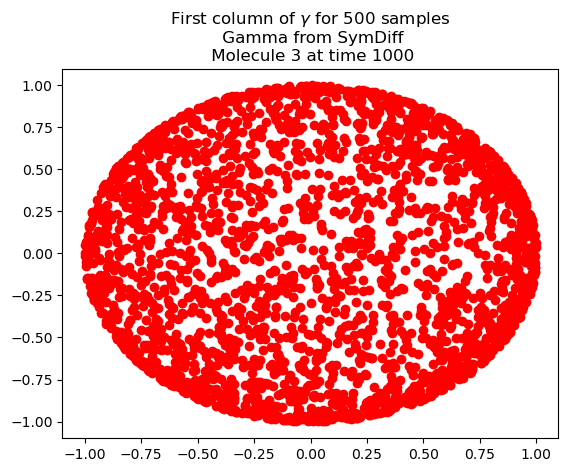

In [57]:
mol = 3
for t in times:
    gamma_x = mol_results[mol]["gamma_samples"][t]
    gamma_x = gamma_x[:, :2, 0]
    # gamma_x = gamma_x[:500]

    fig = plt.figure()
    plt.scatter(gamma_x[:, 0], gamma_x[:, 1], c='r', marker='o')
    plt.title(f'First column of $\gamma$ for 500 samples\n Gamma from SymDiff\n Molecule {mol} at time {t}')
    plt.show()

    

### Visualising gamma backbone samples

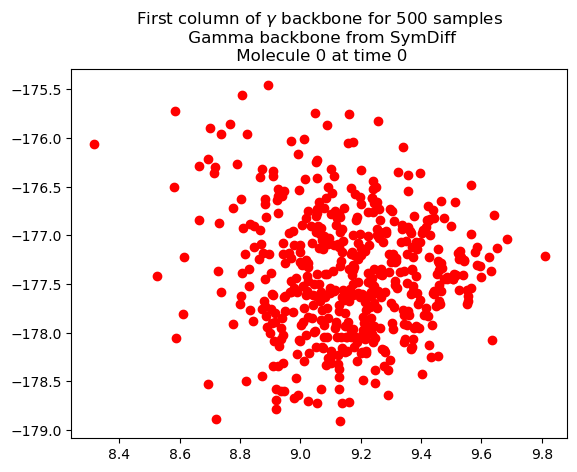

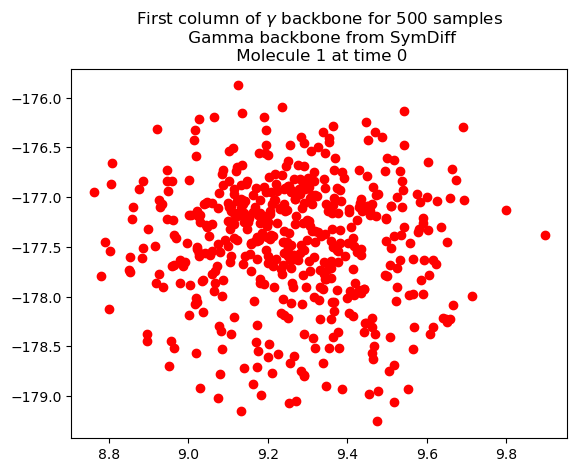

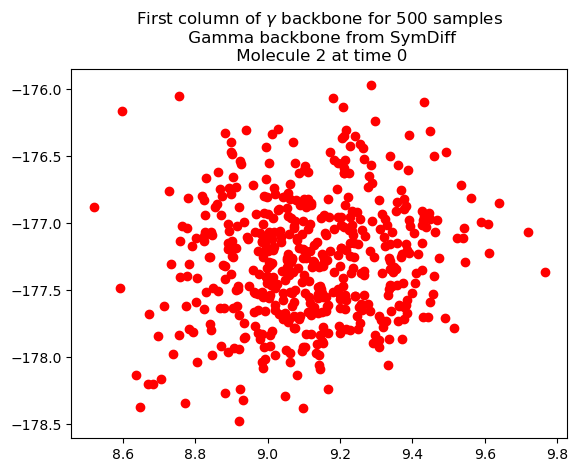

In [75]:
mols = [0, 1, 2]
atom = 0
times_ = [0]
dims = [1, 20]
for mol in mols:    
    for t in times_:
        gamma_x = mol_results[mol]["gamma_backbone_samples"][t][:, atom, :]
        gamma_x = gamma_x[:, dims]
        gamma_x = gamma_x[:500]

        fig = plt.figure()
        plt.scatter(gamma_x[:, 0], gamma_x[:, 1], c='r', marker='o')
        plt.title(f'First column of $\gamma$ backbone for 500 samples\n Gamma backbone from SymDiff\n Molecule {mol} at time {t}')
        plt.show()

        

## Ad-hoc

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# Load  data at /data/localhost/not-backed-up/ashouritaklimi/symdiff/stochastic_gamma_samples.npy
mol = 2
exp_name = 'check_stochasticity_gamma_30m_finetuning_ph'
gamma_data = np.load(f'/data/localhost/not-backed-up/ashouritaklimi/symdiff/stochastic_gamma_samples_{mol}.npy')
xh_data = np.load(f'/data/localhost/not-backed-up/ashouritaklimi/symdiff/stochastic_xh_samples_{mol}.npy')
x = xh_data[:, :, :3]
h = xh_data[:, :, 3:]

# Print shapes
print(gamma_data.shape)
print(xh_data.shape)
print(x.shape)
print(h.shape)

(5000, 3, 3)
(5000, 26, 9)
(5000, 26, 3)
(5000, 26, 6)


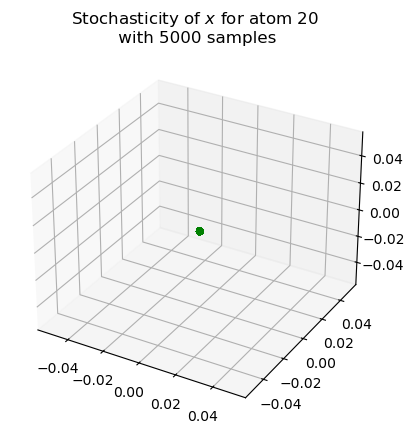

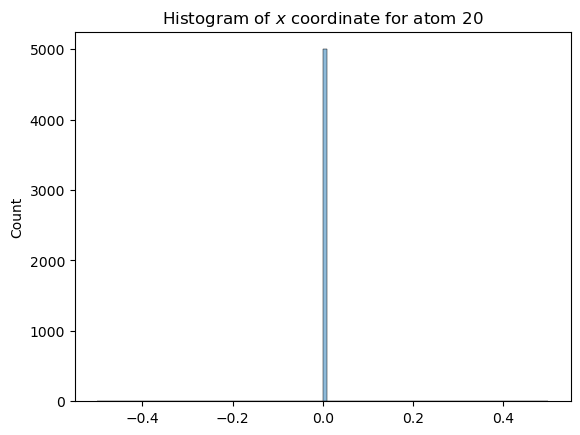

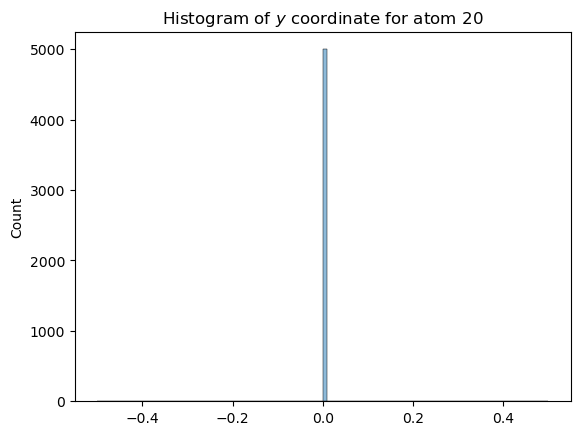

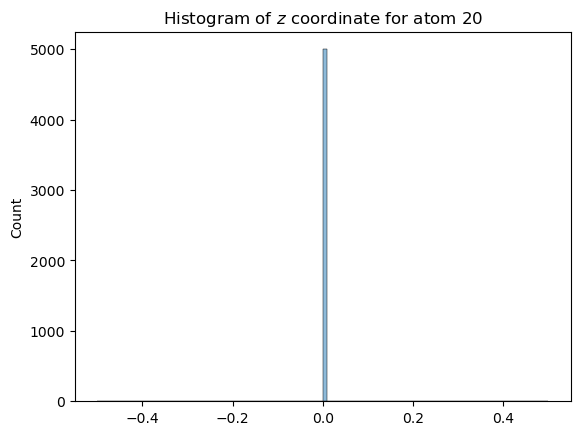

In [23]:
# Plotting atoms

n_atoms = xh_data.shape[1]
atom_idx = np.random.randint(n_atoms)
x_atom = x[:, atom_idx]

# Create a 3D plot of gamma-x (shape 5000, 3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_atom[:, 0], x_atom[:, 1], x_atom[:, 2], c='g', marker='o')
plt.title(f'Stochasticity of $x$ for atom {atom_idx}\n with 5000 samples')
plt.show()


# Histogram of x coordinate
x_atom_x = x_atom[:, 0]
x_atom_y = x_atom[:, 1]
x_atom_z = x_atom[:, 2]

# Plot histogram
sns.histplot(x_atom_x, kde=True, bins=100)
plt.title(f'Histogram of $x$ coordinate for atom {atom_idx}')
plt.show()

# Plot histogram
sns.histplot(x_atom_y, kde=True, bins=100)
plt.title(f'Histogram of $y$ coordinate for atom {atom_idx}')
plt.show()

# Plot histogram
sns.histplot(x_atom_z, kde=True, bins=100)
plt.title(f'Histogram of $z$ coordinate for atom {atom_idx}')
plt.show()


torch.Size([500, 2])


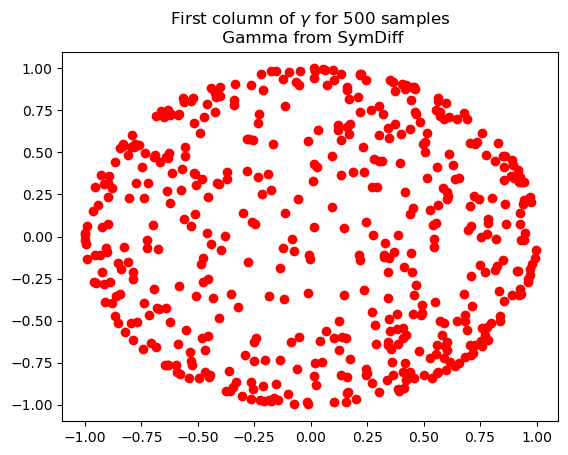

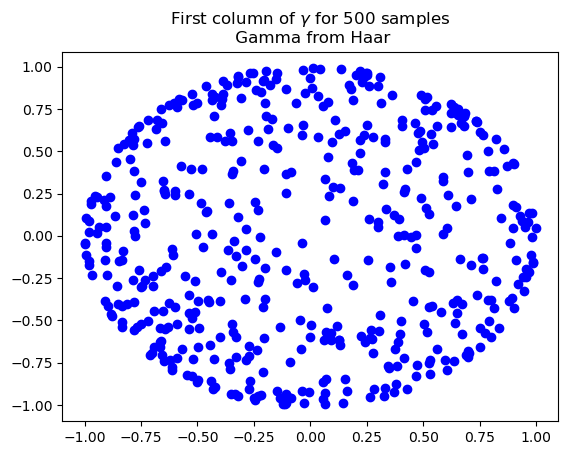

In [27]:
# Subset the gamma by [:, :, 0]
indices = np.random.choice(gamma_data.shape[0], 500, replace=False)
gamma_x = gamma_data[indices, :2, 0]

# Create a random tensor x of size 5000, 3
x = torch.rand(500, 3)
g_haar = sym_nn_utils.orthogonal_haar(dim=3, target_tensor=x)

# Subset g_haar to take the first two rows of the first coluns
g_haar = g_haar[:, :2, 0]
print(g_haar.shape)


# Create a 3D plot of gamma-x (shape 5000, 3)
fig = plt.figure()
plt.scatter(gamma_x[:, 0], gamma_x[:, 1], c='r', marker='o')
plt.title('First column of $\gamma$ for 500 samples\n Gamma from SymDiff')
plt.show()



# Create a 3D plot of gamma-x (shape 5000, 3)
fig = plt.figure()
plt.scatter(g_haar[:, 0], g_haar[:, 1], c='b', marker='o')
plt.title('First column of $\gamma$ for 500 samples\n Gamma from Haar')
plt.show()



In [36]:
from scipy.stats import wasserstein_distance_nd

In [1]:
import torch

In [4]:
a = torch.randint(1, 2, size=(500, 3)).float()
a.shape, a

(torch.Size([500, 3]),
 tensor([[1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.],
         ...,
         [1., 1., 1.],
         [1., 1., 1.],
         [1., 1., 1.]]))

WD between gamma_x and g_haar
0.02428133236346039
WD between g_haar and g_haar_2
0.019888868435833137


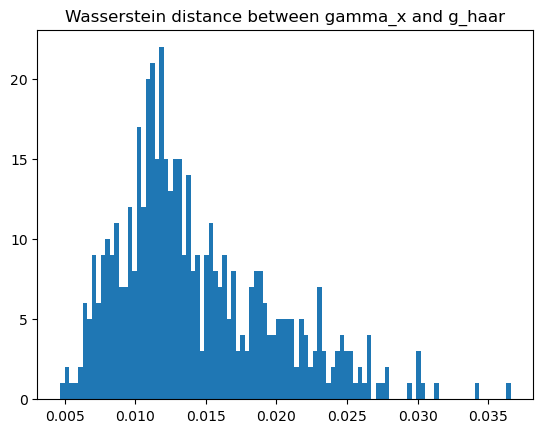

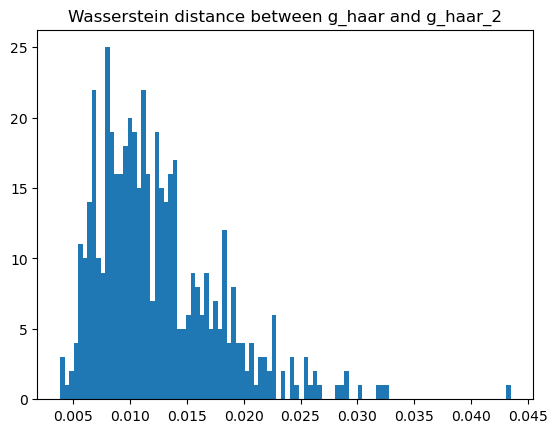

In [70]:
# Subset the gamma by [:, :, 0]
indices = np.random.choice(gamma_data.shape[0], 5000, replace=False)
gamma_x = gamma_data[indices, 0, 0]

# Create a random tensor x of size 5000, 3
x = torch.rand(5000, 3)
g_haar = sym_nn_utils.orthogonal_haar(dim=3, target_tensor=x)

# Subset g_haar to take the first two rows of the first coluns
g_haar = g_haar[:, 0, 0]

# Compute the Wasserstein distance between gamma_x and g_haar
wasserstein_distance_1 = wasserstein_distance_nd(gamma_x, g_haar)
print("WD between gamma_x and g_haar")
print(wasserstein_distance_1)

# Take another 5000 samples of haar
g_haar_2 = sym_nn_utils.orthogonal_haar(dim=3, target_tensor=x)
g_haar_2 = g_haar_2[:, 0, 0]
wasserstein_distance_3 = wasserstein_distance_nd(g_haar, g_haar_2)
print("WD between g_haar and g_haar_2")
print(wasserstein_distance_3)

n_times = 500
wd_1 = []
wd_2 = []
for i in range(n_times):
    g_haar = sym_nn_utils.orthogonal_haar(dim=3, target_tensor=x)
    g_haar = g_haar[:, 0, 0]

    # Compute the Wasserstein distance between gamma_x and g_haar
    wasserstein_distance_1 = wasserstein_distance_nd(gamma_x, g_haar)
    # Take another 5000 samples of haar
    g_haar_2 = sym_nn_utils.orthogonal_haar(dim=3, target_tensor=x)
    g_haar_2 = g_haar_2[:, 0, 0]
    wasserstein_distance_2 = wasserstein_distance_nd(g_haar, g_haar_2)

    wd_1.append(wasserstein_distance_1)
    wd_2.append(wasserstein_distance_2)

plt.hist(wd_1, bins=100)
plt.title('Wasserstein distance between gamma_x and g_haar')
plt.show()

plt.hist(wd_2, bins=100)
plt.title('Wasserstein distance between g_haar and g_haar_2')
plt.show()




# Create a 3D plot of gamma-x (shape 5000, 3)
# fig = plt.figure()
# plt.hist(gamma_x, bins=100)
# plt.title('First column of $\gamma$ for 500 samples\n Gamma from SymDiff')
# plt.show()



# # Create a 3D plot of gamma-x (shape 5000, 3)
# fig = plt.figure()
# plt.hist(g_haar, bins=100)
# plt.title('First column of $\gamma$ for 500 samples\n Gamma from Haar')
# plt.show()

In [71]:
print(np.mean(wd_1))
print(np.mean(wd_2))

0.014269566410500981
0.012442241464934544


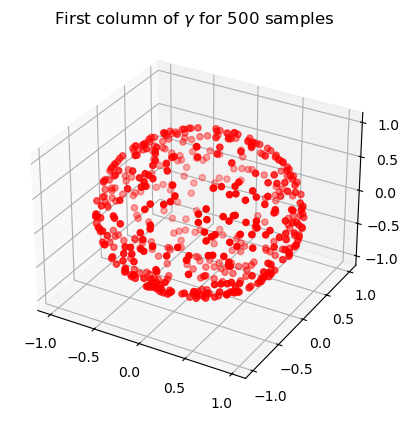

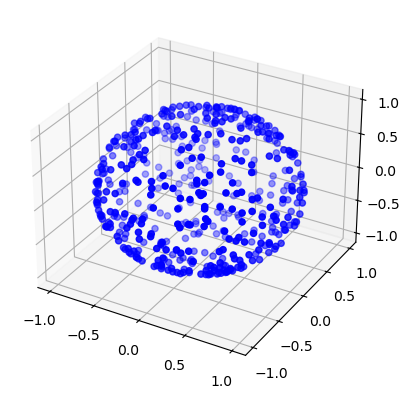

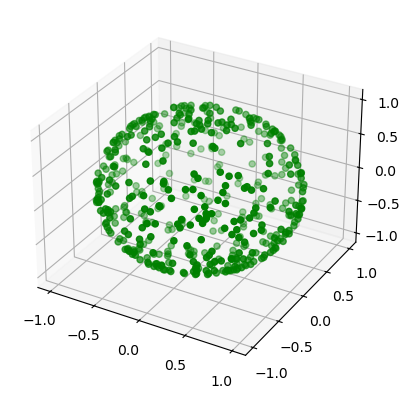

In [12]:
# Subset the gamma by [:, :, 0]
indices = np.random.choice(gamma_data.shape[0], 500, replace=False)
gamma_x = gamma_data[indices, :2, 0]

# Create a 3D plot of gamma-x (shape 5000, 3)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(gamma_x[:, 0], gamma_x[:, 1], gamma_x[:, 2], c='r', marker='o')
plt.title('First column of $\gamma$ for 500 samples')
plt.show()

# # Subset the gamma by [:, :, 0]
# indices = np.random.choice(gamma_data.shape[0], 500, replace=False)
# gamma_y = gamma_data[indices, :, 0]

# # Create a 3D plot of gamma-x (shape 5000, 3)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(gamma_y[:, 0], gamma_y[:, 1], gamma_y[:, 2], c='b', marker='o')
# plt.show()

# # Subset the gamma by [:, :, 0]
# indices = np.random.choice(gamma_data.shape[0], 500, replace=False)
# gamma_z = gamma_data[indices, :, 0]

# # Create a 3D plot of gamma-x (shape 5000, 3)
# fig = plt.figure()
# ax = fig.add_subplot(111, projection='3d')
# ax.scatter(gamma_z[:, 0], gamma_z[:, 1], gamma_z[:, 2], c='g', marker='o')
# plt.show()

# Statistics

In [1]:
import statistics

In [3]:
metrics = {
    "atom": [],
    "mol": [],
    "unique": [], 
    "vald": [], 
    "nov": [], 
    "nll": []
}


In [4]:
metrics = {
    "atom": [0.9863429018008081, 0.9865010439340767, 0.9864464092685495],
    "mol": [0.8639, 0.8655, 0.8637],
    "unique": [0.9827, 0.9816, 0.9807], 
    "vald": [0.9542, 0.9556, 0.9543], 
    "nov": [0.5497, 0.5611, 0.5590], 
    "nll": [-127.06420381227181, -128.78557825430374, -129.68950426124573]
}



metrics["atom"] = [a*100 for a in metrics["atom"]]
metrics["mol"] = [a*100 for a in metrics["mol"]]
metrics["unique"] = [a*100 for a in metrics["unique"]]
metrics["vald"] = [a*100 for a in metrics["vald"]]
metrics["nov"] = [a*100 for a in metrics["nov"]]

In [5]:
for metric, values in metrics.items():
    mean = statistics.mean(values)
    std_dev = statistics.stdev(values)
    print(f"{metric} mean: {mean}")
    print(f"{metric} std_dev: {std_dev}")
    # Print mean +/- std_dev up to 2 decimal places
    print(f"{metric} mean: {mean:.2f} $\spm{std_dev:.2f}")

    print("--------")   

atom mean: 98.64301183344782
atom std_dev: 0.00803198573104823
atom mean: 98.64 $\spm0.01
--------
mol mean: 86.43666666666667
mol std_dev: 0.0986576572463298
mol mean: 86.44 $\spm0.10
--------
unique mean: 98.16666666666667
unique std_dev: 0.10016652800877263
unique mean: 98.17 $\spm0.10
--------
vald mean: 95.47
vald std_dev: 0.07810249675906557
vald mean: 95.47 $\spm0.08
--------
nov mean: 55.660000000000004
nov std_dev: 0.6067124524847047
nov mean: 55.66 $\spm0.61
--------
nll mean: -128.5130954426071
nll std_dev: 1.3336925334754803
nll mean: -128.51 $\spm1.33
--------


<>:7: SyntaxWarning: invalid escape sequence '\s'
<>:7: SyntaxWarning: invalid escape sequence '\s'
/tmp/ipykernel_1043358/2838265903.py:7: SyntaxWarning: invalid escape sequence '\s'
  print(f"{metric} mean: {mean:.2f} $\spm{std_dev:.2f}")
